## Observations and Insights 

In [42]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combine_mouse_data_df = pd.merge(mouse_metadata, study_results, how='left', on='Mouse ID') 

# Display the data table for preview
mouse_df = combine_mouse_data_df.rename(columns={'Tumor Volume (mm3)': 'Tumor_volume'}) 
mouse_df



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor_volume,Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [43]:
# Check the number of mice.
number_of_mouse_count = mouse_df["Mouse ID"].count()
number_of_mouse_count

1893

In [44]:
# Find any duplicate rows with the same Mouse ID's and Timepoints. 
rows_duplicated = mouse_df[mouse_df.duplicated(['Mouse ID', 'Timepoint'])]
rows_duplicated

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor_volume,Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Before dropping all duplicate rows I have to check and get all duplicate rows for Mouse ID
duplicate_rows_for_mouseID = mouse_df[mouse_df.duplicated(['Mouse ID',])]
duplicate_rows_for_mouseID 


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor_volume,Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Drop any duplicate rows to get a good dataframe by using the Mouse ID 
good_df = mouse_df.drop_duplicates("Mouse ID")
good_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor_volume,Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, 
# standard deviation, and SEM of the tumor volume for each regimen.

reg_mean = mouse_df.groupby('Drug Regimen')['Tumor_volume'].mean()

reg_median = mouse_df.groupby('Drug Regimen')['Tumor_volume'].median()

reg_variance = mouse_df.groupby('Drug Regimen')['Tumor_volume'].var()

reg_standard_dv = mouse_df.groupby('Drug Regimen')['Tumor_volume'].std()

reg_sem = mouse_df.groupby('Drug Regimen')['Tumor_volume'].sem()

summary_stats_df = pd.DataFrame({"Mean": reg_mean, "Median": reg_median, "Variance": reg_variance, "Standard Deviation": reg_standard_dv, "SEM": reg_sem})
summary_stats_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [7]:
# Generate a bar plot showing the total number of datapoints for each drug regimen using pandas.

# There should be a single bar per regimen

drug_reg_data = pd.DataFrame(mouse_df.groupby(["Drug Regimen"]).count()).reset_index()

# Change dataframe to two columns
drugs_reg_df = drug_reg_data[["Drug Regimen", "Mouse ID"]]

drugs_reg_df = drugs_reg_df.set_index("Drug Regimen")

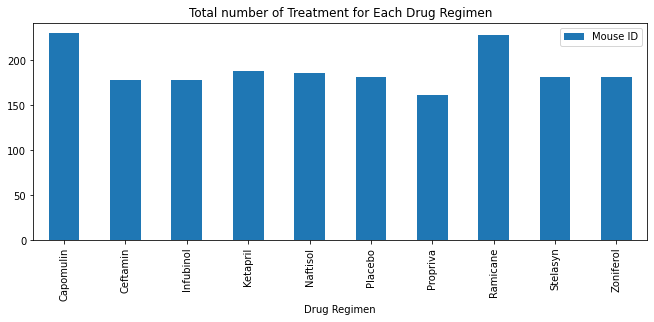

<Figure size 432x288 with 0 Axes>

In [8]:
#Creating the bar chart
drugs_reg_df.plot(kind="bar", figsize=(11,4))

plt.title("Total number of Treatment for Each Drug Regimen")
plt.show()
plt.tight_layout()

In [9]:
# Generate identical bar plot using pyplot instead of pandas.
list_of_drugs = summary_stats_df.index.tolist()
list_of_drugs

['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

In [10]:
# Creating a list of drug_count 
count_of_drugs = (mouse_df.groupby(["Drug Regimen"])["Age_months"].count()).tolist()
count_of_drugs

[230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

In [11]:
x_axis = np.arange(len(count_of_drugs))

Text(0, 0.5, 'Count')

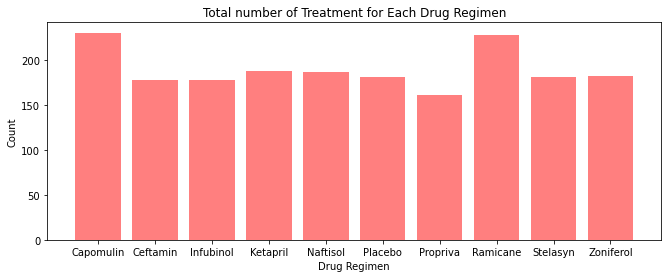

In [12]:
# Adding value to x-axis
x_axis = list_of_drugs

# Creating the  bar chart
plt.figure(figsize=(11,4))
plt.bar(x_axis, count_of_drugs, color='r', alpha=0.5, align="center")

plt.title("Total number of Treatment for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_gender_df = pd.DataFrame(mouse_df.groupby(["Sex"]).count()).reset_index()
mice_gender_df.head()

,Sex,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor_volume,Metastatic Sites
0,Female,935,935,935,935,935,935,935
1,Male,958,958,958,958,958,958,958


In [14]:
# Modify dataframe to two columns
mice_gender_df = mice_gender_df[["Sex","Mouse ID"]]
mice_gender_df.head()

,Sex,Mouse ID
0,Female,935
1,Male,958


Text(0, 0.5, '')

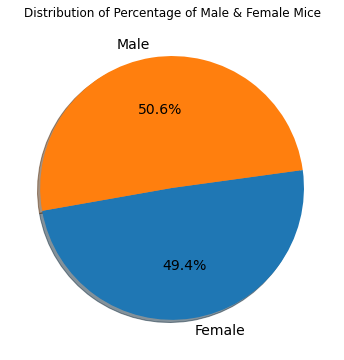

In [15]:
plt.figure(figsize=(13,8))
xaxis = plt.subplot(121, aspect="equal")
mice_gender_df.plot(kind="pie", y = "Mouse ID", ax=xaxis, autopct='%1.1f%%',
              startangle=190, shadow=True, labels=mice_gender_df["Sex"], legend = False, fontsize=14)

plt.title("Distribution of Percentage of Male & Female Mice")
plt.xlabel("")
plt.ylabel("")

In [16]:
# Generate identical pie plot using pyplot
mice_gender_count = (mouse_df.groupby(["Sex"])["Age_months"].count()).tolist()
mice_gender_count

[935, 958]

In [17]:
# Placing specific values to the pie chart
labels = ["Females", "Males"]
colors = ["orange", "blue"]
explode = (0.1, 0)

(-1.168554778187085,
 1.1046347624021708,
 -1.2267182048220846,
 1.1096662105117718)

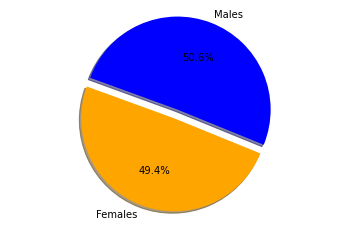

In [18]:
 # creating the pie chart
plt.pie(mice_gender_count,explode=explode, labels=labels, colors=colors, autopct="%3.1f%%", shadow=True, startangle=160)
plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor_volume,Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [20]:
# Collecting and arranging columns of  "Drug Regimen", "Mouse ID" and "Timepoint"
arrange_df = mouse_df.sort_values(["Drug Regimen", "Mouse ID", "Timepoint"], ascending=True)
final_df = arrange_df.loc[arrange_df["Timepoint"] == 45]
final_df.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor_volume,Metastatic Sites
0,309,b128,Capomulin,Female,9,22,45,38.982878,2
1,299,b742,Capomulin,Male,7,21,45,38.939633,0
2,244,g288,Capomulin,Male,3,19,45,37.074024,1
3,360,g316,Capomulin,Female,22,22,45,40.159220,2
4,440,i557,Capomulin,Female,1,24,45,47.685963,1


In [21]:
 # Collecting data from "Capomulin" and reset index
capomulin_df = final_df[final_df["Drug Regimen"].isin(["Capomulin"])]
capomulin_df.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor_volume,Metastatic Sites
0,309,b128,Capomulin,Female,9,22,45,38.982878,2
1,299,b742,Capomulin,Male,7,21,45,38.939633,0
2,244,g288,Capomulin,Male,3,19,45,37.074024,1
3,360,g316,Capomulin,Female,22,22,45,40.159220,2
4,440,i557,Capomulin,Female,1,24,45,47.685963,1


In [22]:
 # Change column "Tumor_volume " a dataframe object
capomulin_obj = capomulin_df.sort_values(["Tumor_volume"], ascending=True).reset_index()
capomulin_obj = capomulin_obj["Tumor_volume"]
capomulin_obj

0     23.343598
1     28.430964
2     28.484033
3     31.023923
4     31.896238
5     32.377357
6     33.329098
7     34.455298
8     36.041047
9     37.074024
10    37.311846
11    38.125164
12    38.846876
13    38.939633
14    38.982878
15    40.159220
16    40.658124
17    40.728578
18    41.483008
19    41.581521
20    47.685963
Name: Tumor_volume, dtype: float64

Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

In [23]:
# Calculate quartiles, IQR, and identify potential outliers for each regimen.

# If the data is in a dataframe, we use pandas to give quartile calculations

quartiles = capomulin_obj.quantile([.25,.5,.75])
lower_quartiles = quartiles[0.25]
upper_quartiles = quartiles[0.75]
inter_quartile_range = upper_quartiles - lower_quartiles

print(f"The lower quartile of temperatures is: {lower_quartiles}")
print(f"The upper quartile of temperatures is: {upper_quartiles}")
print(f"The interquartile range of temperatures is: {inter_quartile_range}")
print(f"The median of temperatures is: {quartiles[0.5]}")

lower_bound = lower_quartiles - (1.5*inter_quartile_range)
upper_bound = upper_quartiles + (1.5*inter_quartile_range)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 32.37735684
The upper quartile of temperatures is: 40.1592203
The interquartile range of temperatures is: 7.781863460000004
The median of temperatures is: 37.31184577
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


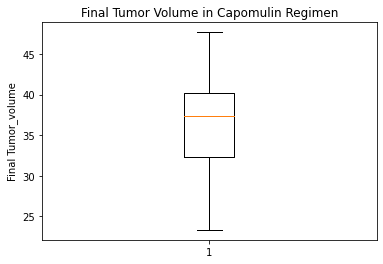

In [24]:
# Creating a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, x_axis = plt.subplots()
x_axis.set_title("Final Tumor Volume in Capomulin Regimen")
x_axis.set_ylabel("Final Tumor_volume")
x_axis.boxplot(capomulin_obj)
plt.show()

In [25]:
# Collectting data from "Ramicane" and reset index
ramicane_df = final_df[final_df["Drug Regimen"].isin(["Ramicane"])]
ramicane_df.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor_volume,Metastatic Sites
0,327,a411,Ramicane,Male,3,22,45,38.407618,1
1,430,a444,Ramicane,Female,10,25,45,43.047543,0
2,214,a520,Ramicane,Male,13,21,45,38.810366,1
3,174,a644,Ramicane,Female,7,17,45,32.978522,1
4,154,c758,Ramicane,Male,9,17,45,33.397653,1


In [26]:
 # Changing column "Tumor_volume" a dataframe object
ramicane_obj = ramicane_df.sort_values(["Tumor_volume"], ascending=True).reset_index()
ramicane_obj = ramicane_obj["Tumor_volume"]
ramicane_obj

0     22.050126
1     29.128472
2     30.276232
3     30.564625
4     30.638696
5     31.095335
6     31.560470
7     32.978522
8     33.397653
9     33.562402
10    36.134852
11    36.374510
12    37.225650
13    37.311236
14    38.407618
15    38.810366
16    40.659006
17    40.667713
18    43.047543
19    45.220869
Name: Tumor_volume, dtype: float64

In [27]:
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = ramicane_obj.quantile([.25,.5,.75])
lower_quartile = quartiles[0.25]
upper_quartile = quartiles[0.75]
inter_quartile_range = upper_quartile - lower_quartile

print(f"The lower quartile of temperatures is: {lower_quartile}")
print(f"The upper quartile of temperatures is: {upper_quartile}")
print(f"The interquartile range of temperatures is: {inter_quartile_range}")
print(f"The median of temperatures is: {quartiles[0.5]}")

lower_bound = lower_quartile - (1.5*inter_quartile_range)
upper_bound = upper_quartile + (1.5*inter_quartile_range)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 30.981175224999998
The upper quartile of temperatures is: 38.508305307499995
The interquartile range of temperatures is: 7.527130082499998
The median of temperatures is: 34.848627300000004
Values below 19.690480101250003 could be outliers.
Values above 49.79900043124999 could be outliers.


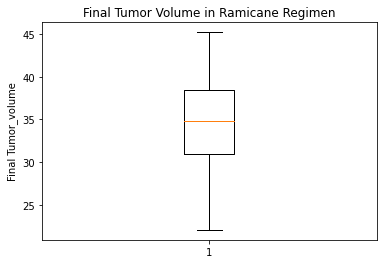

In [28]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, x_axis = plt.subplots()
x_axis.set_title("Final Tumor Volume in Ramicane Regimen")
x_axis.set_ylabel("Final Tumor_volume")
x_axis.boxplot(ramicane_obj)
plt.show()

In [29]:
# Collecting data from "Infubinol" and reset index

infubinol_df = final_df[final_df["Drug Regimen"].isin(["Infubinol"])]
infubinol_df.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor_volume,Metastatic Sites
0,463,a203,Infubinol,Female,20,23,45,67.973419,2
1,473,a251,Infubinol,Female,21,25,45,65.525743,1
2,540,a685,Infubinol,Male,8,30,45,66.083066,3
3,637,c139,Infubinol,Male,11,28,45,72.226731,2
4,800,e476,Infubinol,Male,23,26,45,62.435404,1


In [30]:
# Changing column "Tumor_volume" a dataframe object
infubinol_obj = infubinol_df.sort_values(["Tumor_volume"], ascending=True).reset_index()
infubinol_obj = infubinol_obj["Tumor_volume"]
infubinol_obj

0    60.918767
1    62.435404
2    62.754451
3    65.525743
4    66.083066
5    66.196912
6    67.685569
7    67.973419
8    72.226731
Name: Tumor_volume, dtype: float64

In [31]:
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = infubinol_obj.quantile([.25,.5,.75])
lower_quartile = quartiles[0.25]
upper_quartile = quartiles[0.75]
inter_quartile_range = upper_quartile - lower_quartile

print(f"The lower quartile of temperatures is: {lower_quartile}")
print(f"The upper quartile of temperatures is: {upper_quartile}")
print(f"The interquartile range of temperatures is: {inter_quartile_range}")
print(f"The median of temperatures is: {quartiles[0.5]}")

lower_bound = lower_quartile - (1.5*inter_quartile_range)
upper_bound = upper_quartile + (1.5*inter_quartile_range)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 62.75445141
The upper quartile of temperatures is: 67.68556862
The interquartile range of temperatures is: 4.9311172099999965
The median of temperatures is: 66.08306589
Values below 55.35777559500001 could be outliers.
Values above 75.08224443499999 could be outliers.


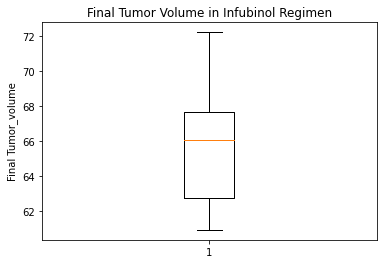

In [32]:
fig1, x_axis = plt.subplots()
x_axis.set_title("Final Tumor Volume in Infubinol Regimen")
x_axis.set_ylabel("Final Tumor_volume")
x_axis.boxplot(infubinol_obj)
plt.show()

In [33]:
# Collecting data from "Ceftamin" and reset index
ceftamin_df = final_df[final_df["Drug Regimen"].isin(["Ceftamin"])]
ceftamin_df.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor_volume,Metastatic Sites
0,493,a275,Ceftamin,Female,20,28,45,62.999356,3
1,993,j296,Ceftamin,Female,24,30,45,61.849023,3
2,1033,k210,Ceftamin,Male,15,28,45,68.923185,3
3,1112,l471,Ceftamin,Female,7,28,45,67.748662,1
4,1132,l661,Ceftamin,Male,18,26,45,59.851956,3


In [34]:
# Changing column "Tumor_volume" a dataframe object
ceftamin_obj = ceftamin_df.sort_values(["Tumor_volume"], ascending=True).reset_index()
ceftamin_obj = ceftamin_obj["Tumor_volume"]
ceftamin_obj

0     59.741901
1     59.851956
2     61.386660
3     61.433892
4     61.849023
5     62.999356
6     64.299830
7     64.634949
8     64.729837
9     67.527482
10    67.748662
11    68.594745
12    68.923185
Name: Tumor_volume, dtype: float64

In [35]:
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = ceftamin_obj.quantile([.25,.5,.75])
lower_quartile = quartiles[0.25]
upper_quartile = quartiles[0.75]
inter_quartile_range = upper_quartile - lower_quartile

print(f"The lower quartile of temperatures is: {lower_quartile}")
print(f"The upper quartile of temperatures is: {upper_quartile}")
print(f"The interquartile range of temperatures is: {inter_quartile_range}")
print(f"The median of temperatures is: {quartiles[0.5]}")

lower_bound = lower_quartile - (1.5*inter_quartile_range)
upper_bound = upper_quartile + (1.5*inter_quartile_range)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 61.43389223
The upper quartile of temperatures is: 67.52748237
The interquartile range of temperatures is: 6.093590140000003
The median of temperatures is: 64.29983003
Values below 52.29350701999999 could be outliers.
Values above 76.66786758 could be outliers.


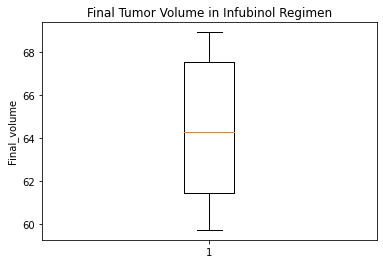

In [36]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, x_axis = plt.subplots()
x_axis.set_title("Final Tumor Volume in Infubinol Regimen")
x_axis.set_ylabel("Final_volume")
x_axis.boxplot(ceftamin_obj)
plt.show()

## Line and Scatter Plots

In [37]:
# Creating a line plot of tumor volume vs. time point for a single mouse 
# treated with Capomulin

capo_df = mouse_df.loc[mouse_df["Drug Regimen"] == "Capomulin"]
capo_df = capo_df.reset_index()
capo_df.head()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor_volume,Metastatic Sites
0,10,s185,Capomulin,Female,3,17,0,45.000000,0
1,11,s185,Capomulin,Female,3,17,5,43.878496,0
2,12,s185,Capomulin,Female,3,17,10,37.614948,0
3,13,s185,Capomulin,Female,3,17,15,38.177232,0
4,14,s185,Capomulin,Female,3,17,20,36.866876,0


In [38]:
 # Collecting data from one mouse
capomulin_mouse = capo_df.loc[capo_df["Mouse ID"] == "s185"]
capomulin_mouse

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor_volume,Metastatic Sites
0,10,s185,Capomulin,Female,3,17,0,45.000000,0
1,11,s185,Capomulin,Female,3,17,5,43.878496,0
2,12,s185,Capomulin,Female,3,17,10,37.614948,0
3,13,s185,Capomulin,Female,3,17,15,38.177232,0
4,14,s185,Capomulin,Female,3,17,20,36.866876,0
5,15,s185,Capomulin,Female,3,17,25,33.949940,0
6,16,s185,Capomulin,Female,3,17,30,32.959671,1
7,17,s185,Capomulin,Female,3,17,35,28.328531,1
8,18,s185,Capomulin,Female,3,17,40,25.472143,1
9,19,s185,Capomulin,Female,3,17,45,23.343598,1


<AxesSubplot:xlabel='Timepoint'>

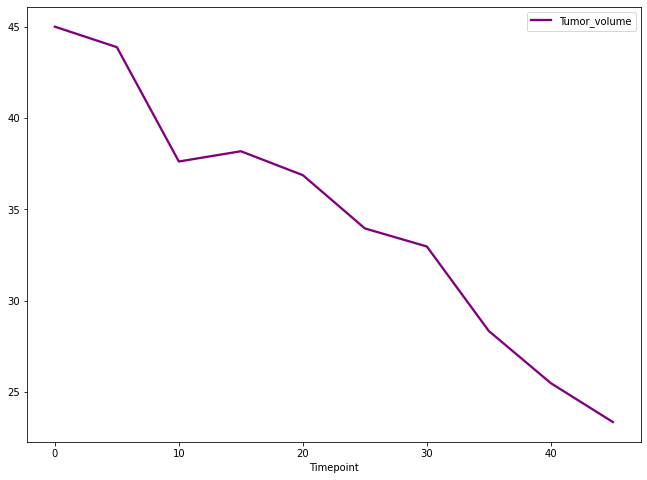

In [39]:
# Grouping data into two columns
    
capomulin_mouse = capomulin_mouse.loc[:, ["Timepoint", "Tumor_volume"]]

# reseting the index to generate a line plot showing the tumor volume for mice treated with Capomulin

capomulin_mouse = capomulin_mouse.reset_index(drop=True)

capomulin_mouse.set_index("Timepoint").plot(figsize=(11,8), linewidth=2.3, color="purple")

In [40]:
# Creating a scatter plot of average tumor volume vs. mouse weight  for all mice in the Capomulin regimen

capo_df.head()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor_volume,Metastatic Sites
0,10,s185,Capomulin,Female,3,17,0,45.000000,0
1,11,s185,Capomulin,Female,3,17,5,43.878496,0
2,12,s185,Capomulin,Female,3,17,10,37.614948,0
3,13,s185,Capomulin,Female,3,17,15,38.177232,0
4,14,s185,Capomulin,Female,3,17,20,36.866876,0


In [48]:
 # Grouping data into 3 columns
    
weight_df = capo_df.loc[:, ["Mouse ID", "Weight (g)", "Tumor_volume"]]

weight_df.head()

,Mouse ID,Weight (g),Tumor_volume
0,s185,17,45.000000
1,s185,17,43.878496
2,s185,17,37.614948
3,s185,17,38.177232
4,s185,17,36.866876


In [50]:
# Get the average tumor volume for each mouse under the use of Capomulin

average_capomulin = pd.DataFrame(weight_df.groupby(["Mouse ID", "Weight (g)"])["Tumor_volume"].mean()).reset_index()

average_capomulin.head()

,Mouse ID,Weight (g),Tumor_volume
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


In [51]:
# Renaming "Tumor_volume" column to "Average Volume"
average_capomulin = average_capomulin.rename(columns={"Tumor_volume": "Average Volume"})
average_capomulin.head()

,Mouse ID,Weight (g),Average Volume
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


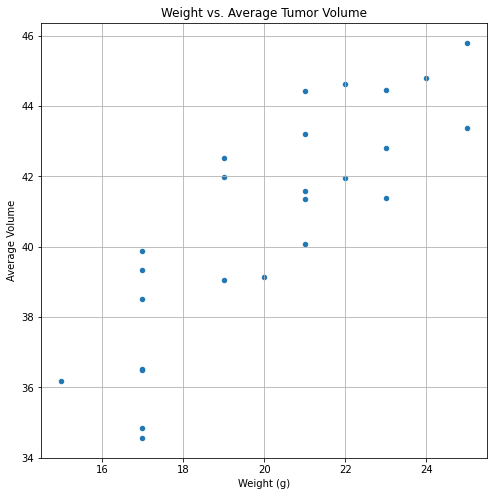

In [61]:
# Creating the scatter plot of mouse wight compared to the average tumor volume for Capomulin

average_capomulin.plot(kind="scatter", x="Weight (g)", y="Average Volume", grid=True, figsize=(8,8), title="Weight vs. Average Tumor Volume")
plt.show()

## Correlation and Regression

Text(0.5, 1.0, 'Weight Vs. Avg Tumor Vol')

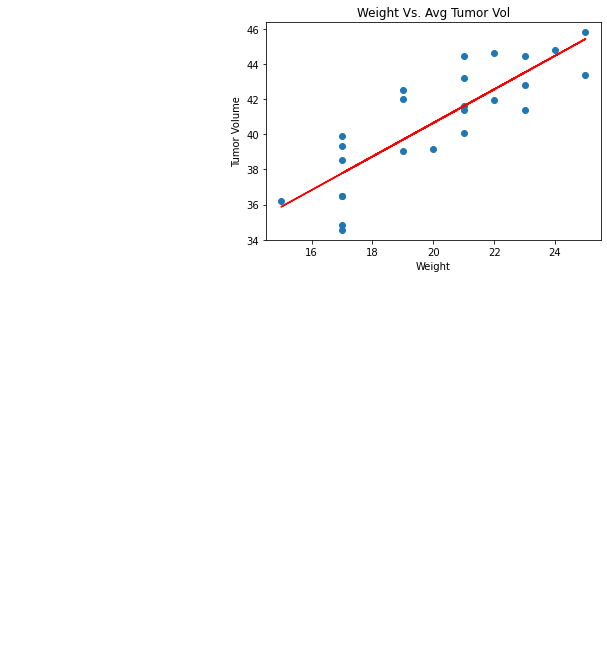

In [66]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Creating values for x and y
x_values = average_capomulin["Weight (g)"]
y_values = average_capomulin["Average Volume"]

# Generating the linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

#finding regression by x values times the slope and intercept
regress_values = x_values * slope + intercept

#Creating the line equation
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))

#PLotting the Scatter
plt.scatter(x_values, y_values)

#PLotting the line
plt.plot(x_values,regress_values,"r-")

#making the line red
plt.annotate(line_eq,(6,10),fontsize=10,color="red")

#Titles and Labels
plt.xlabel("Weight")
plt.ylabel("Tumor Volume")
plt.title("Weight Vs. Avg Tumor Vol")

# Observations and Insights